# WeatherPy

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

## Perform API Calls
- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it'sbeing processed (with the city number and city name)

In [34]:
# Set up URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Set Unit Measurement
units = "imperial"

# Query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Test API Call
response = requests.get(query_url + "New York")
city_data = response.json()
city_data

{'coord': {'lon': -74.006, 'lat': 40.7143},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 33.39,
  'feels_like': 22.95,
  'temp_min': 30,
  'temp_max': 35.6,
  'pressure': 1012,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 250},
 'clouds': {'all': 1},
 'dt': 1612599494,
 'sys': {'type': 1,
  'id': 4610,
  'country': 'US',
  'sunrise': 1612612839,
  'sunset': 1612649978},
 'timezone': -18000,
 'id': 5128581,
 'name': 'New York',
 'cod': 200}

In [4]:
# Create empty lists for data
name = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Print header from starter file
print("Beginning Data Retrieval")
print("----------------------------")

# Create Loop
i = 0 
for city in cities:
    api_data = requests.get(query_url + city).json()
    i = i + 1
    try:
        name.append(api_data["name"])
        lat.append(api_data["coord"]["lat"])
        lon.append (api_data["coord"]["lon"])
        maxtemp.append(api_data["main"]["temp_max"])
        humidity.append(api_data["main"]["humidity"])
        cloudiness.append(api_data["clouds"]["all"])
        wind_speed.append(api_data["wind"]["speed"])
        country.append(api_data["sys"]["country"])
        date.append(api_data["dt"])
        
        #weather_data.append([city, lat, lon, maxtemp, humidity, cloudiness, wind_speed, country, date])
        print(f"Processing Record {i} | {city}")
        #time.sleep(.1)
        
    except:
        print(f"City '{city}' not found. Skipping...")
        

# Print footer from starter file after loop complete
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 | busselton
Processing Record 2 | norman wells
Processing Record 3 | bluff
Processing Record 4 | souillac
Processing Record 5 | cape town
Processing Record 6 | caravelas
City 'belushya guba' not found. Skipping...
Processing Record 8 | cherskiy
Processing Record 9 | tamandare
Processing Record 10 | canyon
Processing Record 11 | hermanus
Processing Record 12 | namibe
Processing Record 13 | saskylakh
Processing Record 14 | saint george
Processing Record 15 | georgetown
Processing Record 16 | airai
Processing Record 17 | rikitea
Processing Record 18 | deputatskiy
Processing Record 19 | asuncion ixtaltepec
Processing Record 20 | bandarbeyla
Processing Record 21 | ilulissat
Processing Record 22 | miyang
Processing Record 23 | acoyapa
Processing Record 24 | paita
Processing Record 25 | kidal
Processing Record 26 | jinchang
Processing Record 27 | belmonte
Processing Record 28 | nanortalik
Processing Record 29 | longyear

Processing Record 245 | kavieng
Processing Record 246 | bambous virieux
Processing Record 247 | maningrida
Processing Record 248 | eyl
Processing Record 249 | morondava
Processing Record 250 | aguimes
Processing Record 251 | lagoa
Processing Record 252 | likasi
City 'chagda' not found. Skipping...
Processing Record 254 | san carlos de bariloche
Processing Record 255 | santa maria
Processing Record 256 | iqaluit
Processing Record 257 | charyshskoye
Processing Record 258 | haines junction
City 'jomalig' not found. Skipping...
Processing Record 260 | basco
Processing Record 261 | olinda
Processing Record 262 | komsomolskiy
Processing Record 263 | saint-pierre
Processing Record 264 | darnah
Processing Record 265 | angoram
Processing Record 266 | sucre
Processing Record 267 | sobolevo
Processing Record 268 | praia
Processing Record 269 | vila do maio
Processing Record 270 | korla
Processing Record 271 | kirya
City 'amderma' not found. Skipping...
Processing Record 273 | kavaratti
Processing

Processing Record 486 | cedar city
Processing Record 487 | ola
Processing Record 488 | dalbandin
Processing Record 489 | lincoln
Processing Record 490 | cap malheureux
Processing Record 491 | bayji
Processing Record 492 | vilhena
Processing Record 493 | araouane
Processing Record 494 | katobu
Processing Record 495 | yuncheng
Processing Record 496 | los llanos de aridane
Processing Record 497 | newport
Processing Record 498 | doha
Processing Record 499 | belomorsk
Processing Record 500 | karatuzskoye
Processing Record 501 | luderitz
Processing Record 502 | ngunguru
Processing Record 503 | sioux lookout
Processing Record 504 | coquimbo
Processing Record 505 | aklavik
Processing Record 506 | mount gambier
Processing Record 507 | tutoia
Processing Record 508 | odesskoye
Processing Record 509 | lavrentiya
Processing Record 510 | erzin
Processing Record 511 | vizinga
Processing Record 512 | san luis
Processing Record 513 | launceston
Processing Record 514 | filingue
Processing Record 515 | r

## Convert Raw Data to DataFrame
- export the city data into .csv file
- display the DataFrame

In [5]:
# Create DataFrame
weather_df = pd.DataFrame({"City": city,
                           "Country": country,
                           "Date": date,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Max Temp (F)": maxtemp,
                           "Humidity (%)": humidity,
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed,
                            })

weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,port lincoln,AU,1612591356,-33.6500,115.3333,69.01,57,100,1.01
1,port lincoln,CA,1612591138,65.2820,-126.8329,-41.80,66,20,2.30
2,port lincoln,NZ,1612591127,-46.6000,168.3333,59.11,80,6,10.33
3,port lincoln,MU,1612591142,-20.5167,57.5167,77.00,94,75,6.91
4,port lincoln,ZA,1612591134,-33.9258,18.4232,71.01,94,20,13.80


In [6]:
# Convert date/time stamp
clean_weather_df = pd.to_datetime(weather_df["Date"], unit = "s")

#Save to CSV
clean_weather_df.to_csv(output_data_file)
clean_weather_df

0     2021-02-06 06:02:36
1     2021-02-06 05:58:58
2     2021-02-06 05:58:47
3     2021-02-06 05:59:02
4     2021-02-06 05:58:54
              ...        
553   2021-02-06 06:04:37
554   2021-02-06 06:07:21
555   2021-02-06 06:07:21
556   2021-02-06 06:07:22
557   2021-02-06 06:07:22
Name: Date, Length: 558, dtype: datetime64[ns]

In [7]:
# Summary Stats
weather_df.describe()

,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,5.580000e+02,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.612591e+09,19.318535,15.587737,50.706774,72.813620,56.159498,7.659803
std,1.265728e+02,33.376968,90.573801,31.801334,20.560748,38.776133,5.320969
min,1.612591e+09,-54.800000,-179.166700,-41.800000,14.000000,0.000000,0.090000
25%,1.612591e+09,-7.791800,-65.222600,32.147500,62.250000,17.000000,3.440000
50%,1.612591e+09,20.789150,19.637400,62.010000,77.000000,66.000000,6.250000
75%,1.612592e+09,47.874700,92.891675,75.200000,89.000000,95.000000,10.705000
max,1.612592e+09,78.218600,176.633300,95.000000,100.000000,100.000000,29.930000


In [8]:
#find cities that have humidity over 100%
humidity_100 = weather_df.loc[weather_df["Humidity (%)"] > 100, :]

humidity_100

,City,Country,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


# Plotting the Data
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

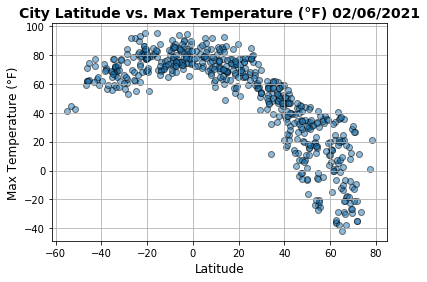

In [13]:
# Scatter Plot

plt.scatter(weather_df["Latitude"], weather_df["Max Temp (F)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Max Temperature (°F) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_temp.png')

 - There appears to be a correlation between global latitude and max temperature of a given location

# Latitude vs. Humidity Plot

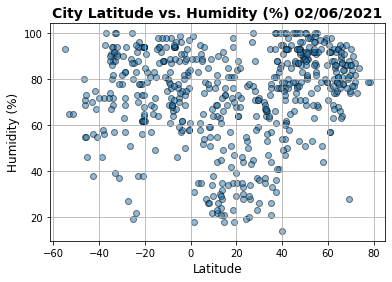

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Humidity (%) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_humidity.png')

- There doesn't appear to be a correlation between latitude and humidity levels. Perhaps a small one in the northern hemisphere if you look at the latitude plots from 0 to 80 but we will find out in the next section.
- Humidity levels in general appear to be above 50% for the majority. Not nearly as many locations below.

## Latitude vs. Cloudiness Plot

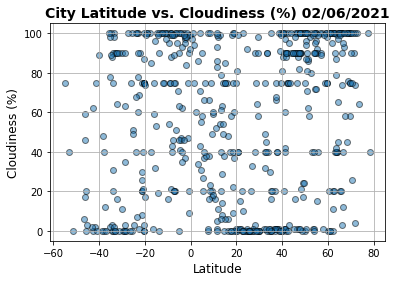

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (%) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_cloud.png')

- Cloudiness appears to have even less of a correlation with latitude than humidity. But interestingly, at a glance there appears to be either 0 or 100% clouds and fewer in between at all degrees of latitude.

## Latitude vs. Wind Speed Plot

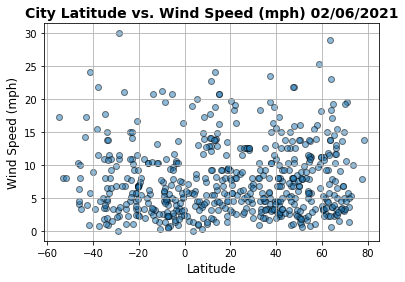

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], alpha=.5, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (mph) 02/06/2021', fontsize=14, fontweight="bold")
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.grid()
plt.savefig('Output_Data/Images/lat_vs_wind.png')

- Similar to humidity and cloudiness, there seems to be little to no correlation between latitude and wind speed. 
- Wind speeds do appear to be relatively low this time of year.

# Linear Regression

In [50]:
# Define Northern and Southern Hemispheres
n_hemi = weather_df.loc[weather_df["Latitude"] >= 0]
s_hemi = weather_df.loc[weather_df["Latitude"] < 0]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere Latitudes and Max Temperatures is -0.87


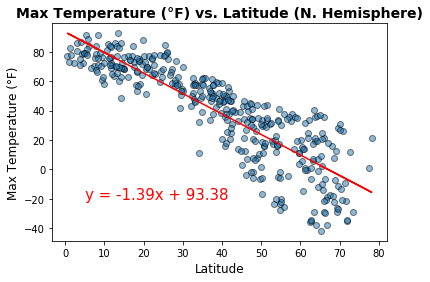

In [57]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Max Temp (F)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere Latitudes and Max Temperatures is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.title('Max Temperature (°F) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_temp.png')
plt.show()


### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere Latitudes and Max Temperatures is 0.58


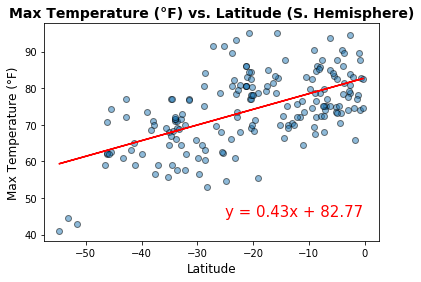

In [58]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Max Temp (F)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere Latitudes and Max Temperatures is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (°F)', fontsize=12)
plt.title('Max Temperature (°F) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_temp.png')
plt.show()


### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and humidity level is 0.47


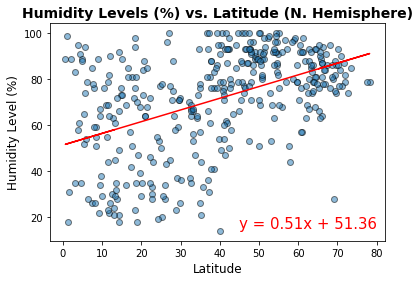

In [59]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Humidity (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and humidity level is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity Level (%)', fontsize=12)
plt.title('Humidity Levels (%) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_humidity.png')
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and humidity level is 0.14


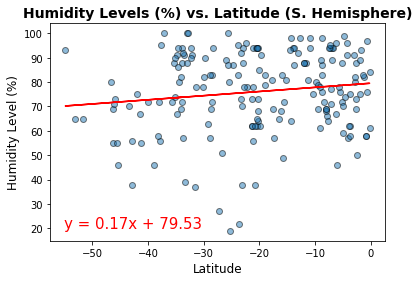

In [61]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Humidity (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and humidity level is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity Level (%)', fontsize=12)
plt.title('Humidity Levels (%) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_humidity.png')
plt.show()

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and cloud percentage is 0.31


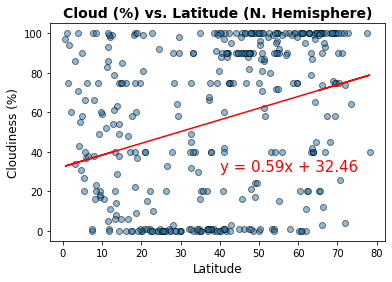

In [65]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Cloudiness (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and cloud percentage is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloud (%) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_cloud.png')
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and cloud percentage is 0.37


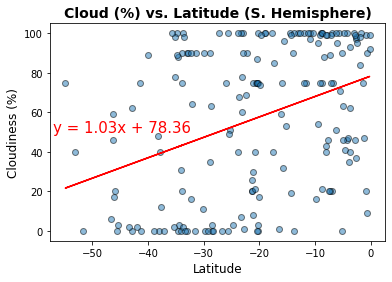

In [78]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Cloudiness (%)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and cloud percentage is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-57,50),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness (%)', fontsize=12)
plt.title('Cloud (%) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_cloud.png')
plt.show()

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation (r-value) between Northern Hemisphere latitudes and wind speed is 0.01


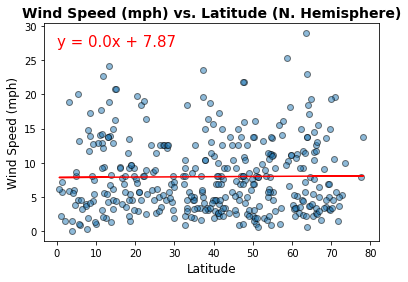

In [80]:
# Define x and y
x = n_hemi['Latitude']
y = n_hemi['Wind Speed (mph)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Northern Hemisphere latitudes and wind speed is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed (mph) vs. Latitude (N. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/north_v_wind.png')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation (r-value) between Southern Hemisphere latitudes and wind speed is -0.19


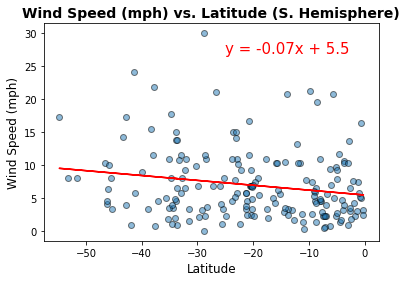

In [83]:
# Define x and y
x = s_hemi['Latitude']
y = s_hemi['Wind Speed (mph)']

# Run correlation and linear regression 
correlation = st.pearsonr(x, y)
print(f"The correlation (r-value) between Southern Hemisphere latitudes and wind speed is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, alpha=.5, edgecolors="black")
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-25,27),fontsize=15,color="red")

# Title and Labels
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)
plt.title('Wind Speed (mph) vs. Latitude (S. Hemisphere)', fontsize=14, fontweight="bold")

plt.savefig('Output_Data/Images/south_v_wind.png')
plt.show()